# Lista de Exercícios 3

Solucionário matemático e computacional de exercícios selecionados da Lista de Exercícios 3.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Funções Implementadas

def gauss_simples(AB):
    '''Realiza o cálculo de um sistema linear através do método de eliminação de Gauss sem pivotamento.
    
    Sinopse:
         X = gauss_simples(AB)
    
    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
     
    Saídas:
         X - Vetor solução do sistema linear
         
         @ney
    '''
    
    # Eliminação progressiva de variáveis
    for i in range(len(AB)):
        for j in range(len(AB)):
            if (j > i):
                m = AB[j,i]/AB[i,i] # Fator multiplicador
                AB[j,:] -= m*AB[i,:] # Eliminação de variável

    # Substituição regressiva
    A = AB[:,0:-1]
    B = AB[:,-1]
    X = np.zeros((len(AB),1))

    for i in range(len(A)-1, -1, -1):
        for j in range(len(A)):
            X[i] -= A[i,j]*X[j]
        X[i] += B[i]
        X[i] /= A[i,i]
    
    X = np.around(X, decimals=3)
        
    return X

def gauss_pivparc(AB):
    '''Realiza o cálculo de um sistema linear através do método de eliminação de Gauss com pivotamento parcial.
    
    Sinopse:
         X = gauss_pivparc(AB)
    
    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
     
    Saídas:
         X - Vetor solução do sistema linear
         
         @ney
    '''
    
    # Eliminação progressiva de variáveis
    for i in range(len(AB)):
        if (i < len(AB)): # Pivotamento parcial
            AB_new = np.flip(AB[i:, i:], 0)
            AB[i:, i:] = AB_new
        for j in range(len(AB)):
            if (j > i):
                m = AB[j,i]/AB[i,i] # Fator multiplicador
                AB[j,:] -= m*AB[i,:] # Eliminação de variável

    # Substituição regressiva
    A = AB[:,0:-1]
    B = AB[:,-1]
    X = np.zeros((len(AB),1))

    for i in range(len(A)-1, -1, -1):
        for j in range(len(A)):
            X[i] -= A[i,j]*X[j]
        X[i] += B[i]
        X[i] /= A[i,i]
    
    X = np.around(X, decimals=3)
        
    return X

def gaussjordan(AB):
    '''Realiza o cálculo de um sistema linear através do método de eliminação de Gauss-Jordan simples.
    
    Sinopse:
         X = gaussjordan(AB)
    
    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
     
    Saídas:
         X - Vetor solução do sistema linear
         
         @ney
    '''
    
    for i in range(len(AB)):
        AB[i,:] /= AB[i,i]
        for j in range(len(AB)):
            if (j != i):
                AB[j,:] -= AB[j,i]*AB[i,:]
    
    AB = np.around(AB, decimals=3)
                
    return AB[:,-1]

def lu_solver(AB):
    '''Realiza o cálculo de um sistema linear através do método de decomposição LU.
    
    Sinopse:
         L, U, X = lu_solver(AB)
    
    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
     
    Saídas:
         L (lu[0]) - Matriz triangular inferior
         U (lu[1]) - Matriz triangular superior
         X (lu[2]) - Vetor solução do sistema linear
         
         @ney
    '''
    
    # Decomposição LU
    U = np.copy(AB)
    U = U[:,0:-1]
    L = np.zeros((len(AB),len(AB)))

    for i in range(len(AB)):
        for j in range(len(AB)):
            if (j > i):
                m = U[j,i]/U[i,i]
                U[j,:] -= m*U[i,:]
                L[j,i] = m
            elif (j == i):
                L[i,i] = 1

    # Substituição progressiva
    B = np.copy(AB)
    B = B[:,-1]
    D = np.zeros((len(AB),1))

    for i in range(len(L)):
        for j in range(len(L)):
            if (i > j):
                D[i] -= L[i,j]*D[j]
        D[i] += B[i]

    # Substituição regressiva
    X = np.zeros((len(AB),1))

    for i in range(len(U)-1, -1, -1):
        for j in range(len(U)):
            X[i] -= U[i,j]*X[j]
        X[i] += D[i]
        X[i] /= U[i,i]
    
    L = np.around(L, decimals=3)
    U = np.around(U, decimals=3)
    X = np.around(X, decimals=3)
    
    return (L, U, X)

def cholesky(AB):
    '''Realiza o cálculo de um sistema linear através do método LU, por decomposição de Cholesky.
    
    Sinopse:
         C = cholesky(AB)
    
    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
     
    Saídas:
         G (C[0]) - Matriz triangular inferior
         X (C[1]) - Vetor solução do sistema linear
         
         @ney
    '''

    # Decomposição de Cholesky
    A = np.copy(AB)
    A = A[:,0:-1]
    G = np.zeros((len(A),len(A)))
    
    for k in range(len(A)):
        for i in range(k):
            s1 = 0
            for j in range(i):
                s1 += G[i,j]*G[k,j]
            G[k,i] = (A[k,i] - s1)/G[i,i]
        s2 = 0
        for j in range(k):
            s2 += (G[k,j])**2
        G[k,k] = np.sqrt(A[k,k] - s2)
    
    # Substituição progressiva
    B = np.copy(AB)
    B = B[:,-1]
    D = np.zeros((len(AB),1))

    for i in range(len(G)):
        for j in range(len(G)):
            if (i > j):
                D[i] -= G[i,j]*D[j]
        D[i] += B[i]
        D[i] /= G[i,i]

    # Substituição regressiva
    GT = G.transpose()
    X = np.zeros((len(AB),1))

    for i in range(len(GT)-1, -1, -1):
        for j in range(len(GT)):
            X[i] -= GT[i,j]*X[j]
        X[i] += D[i]
        X[i] /= GT[i,i]
    
    G = np.around(G, decimals=3)
    X = np.around(X, decimals=3)
    
    return G,X

## Sistemas lineares

### Questão 1

Escreva o seguinte conjunto de equações na forma matricial:

\begin{align} 
8 &= 6x_3 + 2x_2 \\
2 − x_1 &= x_3 \\
5x_2 + x_1 &= 13
\end{align}

Mulitiplique a matriz dos coeficientes por sua transposta, i.e. $AA^T$.

In [4]:
# Solução

A = np.array([[0, 2, 6], [1, 0, 1], [1, 5, 0]])
AT = A.transpose()
B = np.dot(A,AT)

print("A matriz dos coeficientes desse sistema é: \n\n", A)
print("\nA sua transposta é: \n\n", AT)
print("\nLogo, o produto entre A e sua transposta é: \n\n", B)

A matriz dos coeficientes desse sistema é: 

 [[0 2 6]
 [1 0 1]
 [1 5 0]]

A sua transposta é: 

 [[0 1 1]
 [2 0 5]
 [6 1 0]]

Logo, o produto entre A e sua transposta é: 

 [[40  6 10]
 [ 6  2  1]
 [10  1 26]]


### Questão 2

Use o metodo gráfico para resolver:

\begin{align} 
4x_1 − 8x_2 &= −24 \\
−x_1 + 6x_2 &= 34
\end{align}

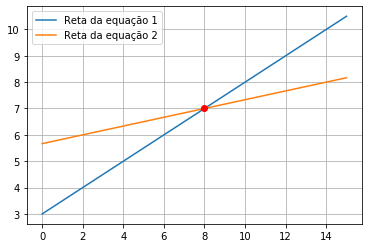

In [5]:
# Solução

def f1(x):
    return (4*x + 24)/8 # x2 isolado na primeira equação

def f2(x):
    return (x + 34)/6 # x2 isolado na segunda equação

x1 = np.linspace(0, 15, 100)

y1 = f1(x1) # Valores de x2 na primeira equação
y2 = f2(x1) # Valores de x2 na segunda equação

plt.plot(x1,y1, label="Reta da equação 1")
plt.plot(x1,y2, label="Reta da equação 2")
plt.grid()
plt.legend()
plt.plot(8,7,'or')

### Questão 3

Para o conjunto de equações:

\begin{align} 
2x_2 + 5x_3 &= 9 \\
2x_1 + x_2 + x_3 &= 9 \\
3x_1 + x_2 &= 10
\end{align}

(i) Calcule o determinante.

(ii) Use a regra de Cramer para determinar $x_1$, $x_2$, $x_3$.

In [6]:
# Solução

# (i)
A = np.array([[0, 2, 5], [2, 1, 1], [3, 1, 0]])
det = np.linalg.det(A)
print("(i) det(A) = ", det)

# (ii)
A = tuple(A)
B = np.array([[9], [9], [10]])
X = []

for coluna in range(len(A)):
    C = np.asarray(A)
    for linha in range(len(A)):
        C[linha][coluna] = B[linha]
    X.append(np.linalg.det(C)/np.linalg.det(np.asarray(A)))

X = [round(i,3) for i in X]
    
print("\n(ii) Os valores de [x1, x2, x3] são:", X)

(i) det(A) =  0.9999999999999991

(ii) Os valores de [x1, x2, x3] são: [6.0, -8.0, 5.0]


### Questão 4

Dadas as equações:

\begin{align} 
10x_1 + 2x_2 − x_3 &= 27 \\
−3x_1 − 6x_2 + 2x_3 &= −61.5 \\
x_1 + 5x_2 + 5x_3 &= −21.5
\end{align}

Resolva por Eliminação de Gauss Simples. Mostre todos os passos de cálculo.

In [7]:
# Solução

AB = np.array([[10., 2., -1., 27], [-3., -6., 2., 61.5], [1., 5., 5., -21.5]])

# Eliminação progressiva de variáveis

f = 0;

for i in range(len(AB)):
    for j in range(len(AB)):
        if (j > i):
            m = AB[j,i]/AB[i,i] # Fator multiplicador
            f += 1
            print("\nO fator multiplicativo", f, "é:", m)
            AB[j,:] -= m*AB[i,:] # Eliminação de variável
            print("Após a eliminação de variável, temos:\n", AB)

# Substituição regressiva

A = AB[:,0:-1]
B = AB[:,-1]
X = np.zeros((3,1))

for i in range(len(A)-1, -1, -1):
    for j in range(len(A)):
        X[i] -= A[i,j]*X[j]
    X[i] += B[i]
    X[i] /= A[i,i]

X = np.around(X, decimals=3)

print("\nA solução do problema é: \n", X)


O fator multiplicativo 1 é: -0.3
Após a eliminação de variável, temos:
 [[ 10.    2.   -1.   27. ]
 [  0.   -5.4   1.7  69.6]
 [  1.    5.    5.  -21.5]]

O fator multiplicativo 2 é: 0.1
Após a eliminação de variável, temos:
 [[ 10.    2.   -1.   27. ]
 [  0.   -5.4   1.7  69.6]
 [  0.    4.8   5.1 -24.2]]

O fator multiplicativo 3 é: -0.8888888888888888
Após a eliminação de variável, temos:
 [[10.          2.         -1.         27.        ]
 [ 0.         -5.4         1.7        69.6       ]
 [ 0.          0.          6.61111111 37.66666667]]

A solução do problema é: 
 [[  5.489]
 [-11.095]
 [  5.697]]


### Questão 5

Use Eliminação de Gauss com pivotamento parcial para resolver:

\begin{align} 
8x_1 + 2x_2 − 2x_3 &= −2 \\
10x_1 + 2x_2 − 4x_3 &= 4 \\
12x_1 + 2x_2 + 2x_3 &= 6
\end{align}

In [8]:
# Solução

AB = np.array([[8., 2., -2., -2], [10., 2., -4., 4], [12., 2., 2., 6]])
X = gauss_pivparc(AB)

print("A solução do problema é: \n", X)

A solução do problema é: 
 [[  2.5]
 [-11.5]
 [ -0.5]]


### Questão 6

Dadas as equações:

\begin{align} 
2x_1 − 6x_2 − x_3 &= −38 \\
−3x_1 − x_2 + 7x_3 &= 34 \\
−8x_1 + x_2 − 2x_3 &= −20
\end{align}

Resolva por Eliminação de Gauss com pivotamento parcial.

In [9]:
# Solução

AB = np.array([[2., -6., -1., -38], [-3., -1., 7., 34], [-8., 1., -2., -20]])
X = gauss_pivparc(AB)
print("A solução do problema é: \n", X)

A solução do problema é: 
 [[1.63 ]
 [5.812]
 [6.386]]


### Questão 7

Use Eliminação de Gauss-Jordan para resolver:

\begin{align} 
2x_1 + x_2 − x_3 &= 1 \\
5x_1 + 2x_2 + 2x_3 &= −4 \\
3x_1 + x_2 + x_3 &= 5
\end{align}

Não utilize pivotamento. Substitua seus resultados nas equações originais para verificá-los.

In [10]:
# Solução

AB = np.array([[2., 1., -1., 1], [5., 2., 2., -4], [3., 1., 1., 5]])
X = gaussjordan(AB)
print("A solução do problema é", X)

A solução do problema é [ 14. -32.  -5.]


### Questão 8 

Resolva:

\begin{align}
x_1 + x_2 − x_3 &= −3 \\
6x_1 + 2x_2 + 2x_3 &= 2 \\
−3x_1 + 4x_2 + x_3 &= 1
\end{align}

(i) Por Eliminação de Gauss simples.

(ii) Por Eliminação de Gauss com pivotamento parcial.

(iii) Por Eliminação de Gauss-Jordan sem pivotamento parcial.

In [11]:
# Solução

# (i) Eliminação de Gauss simples
AB = np.array([[1., 1., -1., -3], [6., 2., 2., 2], [-3., 4., 1., 1]])
X = gauss_simples(AB)
print("(i) A solução do problema, pelo método da eliminação de Gauss simples, é: \n", X)

# (ii) Eliminação de Gauss com pivotamento parcial
AB = np.array([[1., 1., -1., -3], [6., 2., 2., 2], [-3., 4., 1., 1]])
X = gauss_pivparc(AB)
print("\n(ii) A solução do problema, pelo método da eliminação de Gauss com pivotamento parcial, é: \n", X)

# (iii) Eliminação de Gauss-Jordan sem pivotamento parcial
AB = np.array([[1., 1., -1., -3], [6., 2., 2., 2], [-3., 4., 1., 1]])
X = gaussjordan(AB)
print("\n(ii) A solução do problema, pelo método da eliminação de Gauss-Jordan sem pivotamento parcial, é: \n", AB[:,-1])

(i) A solução do problema, pelo método da eliminação de Gauss simples, é: 
 [[-0.25]
 [-0.5 ]
 [ 2.25]]

(ii) A solução do problema, pelo método da eliminação de Gauss com pivotamento parcial, é: 
 [[-0.25]
 [-0.5 ]
 [ 2.25]]

(ii) A solução do problema, pelo método da eliminação de Gauss-Jordan sem pivotamento parcial, é: 
 [-0.25 -0.5   2.25]


## Fatoração LU

### Questão 9

Resolva o seguinte sistema de equações por decomposição LU sem pivotamento (usando a definição A = LU):

\begin{align} 
8x_1 + 4x_2 − x_3 &= 11 \\
−2x_1 + 5x_2 + x_3 &= 4 \\
2x_1 − x_2 + 6x_3 &= 7
\end{align}

Em seguida, determine a matriz inversa $A^{−1} = U^{−1} L^{−1}$. Verifique seus resultados comprovando que $AA^{−1} = I$.

In [12]:
#Solução
AB = np.array([[8., 4., -1., 11.], [-2., 5., 1., 4.], [2., -1., 6., 7.]])

L, U, X = lu_solver(AB)

A = np.copy(AB)
A = A[:,0:-1]

print("A solução do sistema é: \n", X)
print("\nA inversa de A é: \n", np.around(np.linalg.inv(A), decimals=3))
print("\nO produto entre as inversas de U e L é: \n", np.around(np.dot(np.linalg.inv(U),np.linalg.inv(L)), decimals=3))
print("\nO produto entre A e sua inversa é: \n", np.around(np.dot(A,np.linalg.inv(A))))

A solução do sistema é: 
 [[1.]
 [1.]
 [1.]]

A inversa de A é: 
 [[ 0.099 -0.074  0.029]
 [ 0.045  0.16  -0.019]
 [-0.026  0.051  0.154]]

O produto entre as inversas de U e L é: 
 [[ 0.099 -0.074  0.029]
 [ 0.045  0.16  -0.019]
 [-0.026  0.051  0.154]]

O produto entre A e sua inversa é: 
 [[ 1.  0.  0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]


### Questão 10

Resolva o seguinte sistema de equações por decomposição LU com pivotamento parcial.

\begin{align} 
2x_1 − 6x_2 − x_3 &= −38 \\
−3x_1 − x_2 + 7x_3 &= −34 \\
−8x_1 + x_2 − 2x_3 &= −20
\end{align}

Em seguida, determine a matriz inversa $A^{−1} = U^{−1} L^{−1}$. Verifique seus resultados comprovando que $AA^{−1} = I$.

In [13]:
#Solução
AB = np.array([[2., -6., -1., -38.], [-3., -1., 7., -34.], [-8., 1., -2., -20.]])

L, U, X = lu_solver(AB)

A = np.copy(AB)
A = A[:,0:-1]

print("A matriz L é: \n", L)
print("\nA matriz U é: \n", U)
print("\nA solução do sistema é: \n", X)
print("\nA inversa de A é: \n", np.around(np.linalg.inv(A), decimals=3))
print("\nO produto entre as inversas de U e L é: \n", np.around(np.dot(np.linalg.inv(U),np.linalg.inv(L)), decimals=3))
print("\nO produto entre A e sua inversa é: \n", np.around(np.dot(A,np.linalg.inv(A))))

A matriz L é: 
 [[ 1.   0.   0. ]
 [-1.5  1.   0. ]
 [-4.   2.3  1. ]]

A matriz U é: 
 [[  2.    -6.    -1.  ]
 [  0.   -10.     5.5 ]
 [  0.     0.   -18.65]]

A solução do sistema é: 
 [[ 4.]
 [ 8.]
 [-2.]]

A inversa de A é: 
 [[-0.013 -0.035 -0.115]
 [-0.166 -0.032 -0.029]
 [-0.029  0.123 -0.054]]

O produto entre as inversas de U e L é: 
 [[-0.013 -0.035 -0.115]
 [-0.166 -0.032 -0.029]
 [-0.029  0.123 -0.054]]

O produto entre A e sua inversa é: 
 [[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### Questão 11

Resolva o seguinte sistema de equações por decomposição LU.

\begin{align} 
10x_1 + 2x_2 − x_3 &= 27 \\
−3x_1 − 6x_2 + 2x_3 &= −61.5 \\
x_1 + x_2 + 5x_3 &= −21.5
\end{align}

Em seguida, determine a matriz inversa $A^{−1} = U^{−1} L^{−1}$. Verifique seus resultados comprovando que $AA^{−1} = I$.

In [14]:
#Solução
AB = np.array([[10., 2., -1., 27.], [-3., -6., 2., -61.5], [1., 1., 5., -21.5]])

L, U, X = lu_solver(AB)

A = np.copy(AB)
A = A[:,0:-1]

print("A matriz L é: \n", L)
print("\nA matriz U é: \n", U)
print("\nA solução do sistema é: \n", X)
print("\nA inversa de A é: \n", np.around(np.linalg.inv(A), decimals=3))
print("\nO produto entre as inversas de U e L é: \n", np.around(np.dot(np.linalg.inv(U),np.linalg.inv(L)), decimals=3))
print("\nO produto entre A e sua inversa é: \n", np.around(np.dot(A,np.linalg.inv(A))))

A matriz L é: 
 [[ 1.     0.     0.   ]
 [-0.3    1.     0.   ]
 [ 0.1   -0.148  1.   ]]

A matriz U é: 
 [[10.     2.    -1.   ]
 [ 0.    -5.4    1.7  ]
 [ 0.     0.     5.352]]

A solução do sistema é: 
 [[ 0.5]
 [ 8. ]
 [-6. ]]

A inversa de A é: 
 [[ 0.111  0.038  0.007]
 [-0.059 -0.176  0.059]
 [-0.01   0.028  0.187]]

O produto entre as inversas de U e L é: 
 [[ 0.111  0.038  0.007]
 [-0.059 -0.176  0.059]
 [-0.01   0.028  0.187]]

O produto entre A e sua inversa é: 
 [[ 1. -0.  0.]
 [ 0.  1.  0.]
 [-0. -0.  1.]]


## Fatoração de Cholesky

### Questão 12

Determine quais matrizes a seguir são (i) simétricas, (ii) singulares, (iii) diagonalmente dominantes, (iv) positivas definidas.

(a) \begin{pmatrix}
2 & 1 \\
1 & 3
\end{pmatrix}

(b) \begin{pmatrix}
2 & 1 & 0 \\
0 & 3 & 0 \\
1 & 0 & 4
\end{pmatrix}

(c) \begin{pmatrix}
4 & 2 & 6 \\
3 & 0 & 7 \\
-2 & -1 & -3
\end{pmatrix}

(d) \begin{pmatrix}
4 & 0 & 0 & 0 \\
6 & 7 & 0 & 0 \\
9 & 11 & 1 & 0 \\
5 & 4 & 1 & 1
\end{pmatrix}

In [15]:
# Solução

A = np.array([[2., 1.], [1., 3.]])
B = np.array([[2., 1., 0.], [0., 3., 0.], [1., 0., 4.]])
C = np.array([[4., 2., 6.], [3., 0., 7.], [-2., -1., -3.]])
D = np.array([[4., 0., 0., 0.], [6., 7., 0., 0.], [9., 11., 1., 0.], [5., 4., 1., 1.]])

menA = []
for i in range(1,len(A)+1):
    menA.append(np.linalg.det(A[0:i, 0:i]))
print("Os determinantes dos menores principais de (a) são:", np.around(menA, decimals=3))

menB = []
for i in range(1,len(B)+1):
    menB.append(np.linalg.det(B[0:i, 0:i]))
print("\nOs determinantes dos menores principais de (b) são:", np.around(menB, decimals=3))

menC = []
for i in range(1,len(C)+1):
    menC.append(np.linalg.det(C[0:i, 0:i]))
print("\nOs determinantes dos menores principais de (c) são:", np.around(menC, decimals=3))

menD = []
for i in range(1,len(D)+1):
    menD.append(np.linalg.det(D[0:i, 0:i]))
print("\nOs determinantes dos menores principais de (d) são:", np.around(menD, decimals=3))


Os determinantes dos menores principais de (a) são: [2. 5.]

Os determinantes dos menores principais de (b) são: [ 2.  6. 24.]

Os determinantes dos menores principais de (c) são: [ 4. -6.  0.]

Os determinantes dos menores principais de (d) são: [ 4. 28. 28. 28.]


#### Solução:

(i) Apenas a matriz em (a) e simétrica.

(ii) Apenas a matriz em (d) é singular.

(iii) As matrizes em (a) e (b) são diagonalmente dominantes.

(iv) As matrizes em (a), (b) e (d) são positivas-definidas. 

### Questão 13

Determine a fatoração de Cholesky $A = GGT$ das matrizes a seguir.

(a) \begin{pmatrix}
2 & −1 & 0 \\
−1 & 2 & −1 \\
0 & −1 & 2
\end{pmatrix}

(b) \begin{pmatrix}
4 & 1 & 1 & 1 \\
1 & 3 & −1 & 1 \\
1 & −1 & 2 & 0 \\
1 & 1 & 0 & 2
\end{pmatrix}


(c) \begin{pmatrix}
4 & 1 & −1 & 0 \\
1 & 3 & −1 & 0 \\
−1 & −1 & 5 & 2 \\
0 & 0 & 2 & 4
\end{pmatrix}

In [16]:
# Solução

# (a)
print("(a)")
A = np.array([[2., -1., 0.], [-1., 2., -1.], [0., -1., 2.]])
G = np.zeros((len(A),len(A)))

for k in range(len(A)):
    for i in range(k):
        s1 = 0
        for j in range(i):
            s1 += G[i,j]*G[k,j]
        G[k,i] = (A[k,i] - s1)/G[i,i]
    s2 = 0
    for j in range(k):
        s2 += (G[k,j])**2
    G[k,k] = np.sqrt(A[k,k] - s2)

G = np.around(G, decimals=3)

print("A matriz G é:\n", G)

# (b)
print("\n(b)")
B = np.array([[4., 1., 1., 1.], [1., 3., -1., 1.], [1., -1., 2., 0.], [1., 1., 0., 2.]])
G = np.zeros((len(B),len(B)))

for k in range(len(B)):
    for i in range(k):
        s1 = 0
        for j in range(i):
            s1 += G[i,j]*G[k,j]
        G[k,i] = (B[k,i] - s1)/G[i,i]
    s2 = 0
    for j in range(k):
        s2 += (G[k,j])**2
    G[k,k] = np.sqrt(B[k,k] - s2)

G = np.around(G, decimals=3)

print("A matriz G é:\n", G)

# (c)
print("\n(c)")
C = np.array([[4., 1., -1., 0.], [1., 3., -1., 0.], [-1., -1., 5., 2.], [0., 0., 2., 4.]])
G = np.zeros((len(C),len(C)))

for k in range(len(C)):
    for i in range(k):
        s1 = 0
        for j in range(i):
            s1 += G[i,j]*G[k,j]
        G[k,i] = (C[k,i] - s1)/G[i,i]
    s2 = 0
    for j in range(k):
        s2 += (G[k,j])**2
    G[k,k] = np.sqrt(C[k,k] - s2)

G = np.around(G, decimals=3)

print("A matriz G é:\n", G)

(a)
A matriz G é:
 [[ 1.414  0.     0.   ]
 [-0.707  1.225  0.   ]
 [ 0.    -0.816  1.155]]

(b)
A matriz G é:
 [[ 2.     0.     0.     0.   ]
 [ 0.5    1.658  0.     0.   ]
 [ 0.5   -0.754  1.087  0.   ]
 [ 0.5    0.452  0.084  1.24 ]]

(c)
A matriz G é:
 [[ 2.     0.     0.     0.   ]
 [ 0.5    1.658  0.     0.   ]
 [-0.5   -0.452  2.132  0.   ]
 [ 0.     0.     0.938  1.766]]


### Questão 14

Resolva os seguintes sistemas de equações por decomposição de Cholesky.

(a) \begin{cases}
8x_1 + 20x_2 + 15x_3 = 50 \\
20x_1 + 80x_2 + 50x_3 = 250 \\
15x_1 + 50x_2 + 60x_3 = 100
\end{cases}

(b) \begin{cases} 
6x_1 + 15x_2 + 55x_3 = 152.6 \\
15x_1 + 55x_2 + 225x_3 = 585.6 \\
55x_1 + 225x_2 + 979x_3 = 2488.8
\end{cases}

(c)
\begin{cases} 
2x_1 − x_2 = 3 \\
−x_1 + 2x_2 − x_3 = − 3 \\
−x_2 + 2x_3 = 1
\end{cases}

(d)
\begin{cases} 
4x_1 + x_2 + x_3 + x_4 = 0.65 \\
x_1 + 3x_2 − x_3 + x_4 = 0.05 \\
x_1 − x_2 + 2x_3 = 0 \\
x_1 + x_2 + 2x_4 = 0.5
\end{cases}

In [17]:
# Solução

# (a)
print("(a)")
AB = np.array([[8., 20., 15., 50.], [20., 80., 50., 250.], [15., 50., 60., 100.]])
G, X = cholesky(AB)
print("A solução do sistema é: \n", G)

# (b)
print("\n(b)")
AB = np.array([[6., 15., 55., 152.6], [15., 55., 225., 585.6], [55., 225., 979., 2488.8]])
G, X = cholesky(AB)
print("A solução do sistema é: \n", G)

# (c)
print("\n(c)")
AB = np.array([[2., -1., 0., 3.], [-1., 2., -1., -3.], [0., -1., 2., 1.]])
G, X = cholesky(AB)
print("A solução do sistema é: \n", G)

# (d)
print("\n(d)")
AB = np.array([[4., 1., 1., 1., 0.65], [1., 3., -1., 1., 0.05], [1., -1., 2., 0., 0.], [1., 1., 0., 2., 0.5]])
G, X = cholesky(AB)
print("A solução do sistema é: \n", G)

(a)
A solução do sistema é: 
 [[2.828 0.    0.   ]
 [7.071 5.477 0.   ]
 [5.303 2.282 5.164]]

(b)
A solução do sistema é: 
 [[ 2.449  0.     0.   ]
 [ 6.124  4.183  0.   ]
 [22.454 20.917  6.11 ]]

(c)
A solução do sistema é: 
 [[ 1.414  0.     0.   ]
 [-0.707  1.225  0.   ]
 [ 0.    -0.816  1.155]]

(d)
A solução do sistema é: 
 [[ 2.     0.     0.     0.   ]
 [ 0.5    1.658  0.     0.   ]
 [ 0.5   -0.754  1.087  0.   ]
 [ 0.5    0.452  0.084  1.24 ]]
